In [1]:
import matrixprofile as mp
from matrixprofile.preprocess import preprocess
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# source: https://github.com/owid/covid-19-data/tree/master/public/data/
df = pd.read_csv('../data/owid-covid-data.csv', 
                 usecols=['location', 'date', 'new_cases_smoothed', 
                          'new_tests_smoothed', 'positive_rate'])

In [3]:
def get_country_dfs(df, countries):
    out = []
    for country in countries:
        out.append(df[df['location'] == country])
    return out

In [4]:
country_dfs = get_country_dfs(df, ['Estonia', 'Finland', 'Lithuania'])

In [5]:
et_df = country_dfs[0]

In [6]:
et_df[et_df['positive_rate'].isna()]

,location,date,new_cases_smoothed,new_tests_smoothed,positive_rate
17168,Estonia,2020-02-26,NaN,NaN,NaN
17169,Estonia,2020-02-27,NaN,NaN,NaN
17170,Estonia,2020-02-28,NaN,NaN,NaN
17171,Estonia,2020-02-29,NaN,NaN,NaN
17172,Estonia,2020-03-01,NaN,NaN,NaN
17173,Estonia,2020-03-02,NaN,NaN,NaN
17174,Estonia,2020-03-03,0.286,NaN,NaN
17485,Estonia,2021-01-08,590.143,NaN,NaN
17486,Estonia,2021-01-09,614.286,NaN,NaN
17487,Estonia,2021-01-10,NaN,NaN,NaN


In [7]:
fi_df = country_dfs[1]

In [8]:
lt_df = country_dfs[2]

In [9]:
lt_df[lt_df['positive_rate'].isna()]

,location,date,new_cases_smoothed,new_tests_smoothed,positive_rate
31119,Lithuania,2020-02-23,NaN,NaN,NaN
31120,Lithuania,2020-02-28,NaN,NaN,NaN
31121,Lithuania,2020-02-29,NaN,NaN,NaN
31122,Lithuania,2020-03-01,NaN,NaN,NaN
31123,Lithuania,2020-03-02,NaN,NaN,NaN
31124,Lithuania,2020-03-03,NaN,NaN,NaN
31125,Lithuania,2020-03-04,0.143,NaN,NaN
31126,Lithuania,2020-03-05,0.143,NaN,NaN
31127,Lithuania,2020-03-06,0.000,NaN,NaN
31128,Lithuania,2020-03-07,0.000,NaN,NaN


Lithuanian is the only one that also includes NaN-s in the middle. For others, we can just clip the beginnings and ends with NaN-s.

In [10]:
ts = preprocess(et_df['positive_rate'].values, window=14)

In [12]:
query = ts[-14:]

In [67]:
def remove_beginning_nans(df):
    to_remove = 0
    for index, series in df.iterrows():
        if np.isnan(series.at['positive_rate']):
            to_remove += 1
        else:
            break
    return df.iloc[to_remove:]

In [70]:
def df_to_ts(df):
    clipped_df = remove_beginning_nans(df)
    ts = preprocess(clipped_df['positive_rate'].values, window=14)
    dates = clipped_df['date'].values
    return ts, dates

In [87]:
query_ts, _ = df_to_ts(fi_df)

In [88]:
query = query_ts[-14:]

In [89]:
len(query)

14

In [90]:
ts, dates = df_to_ts(et_df)

In [101]:
# compute the MatrixProfile
prof = mp.compute(ts, windows=14,
                  #query=query
                 )

In [102]:
# mp.discover.motifs return the original input profile with the addition
# of the "motifs" key
prof = mp.discover.motifs(prof, 
                          #exclusion_zone=7, 
                          max_neighbors=5)

In [103]:
prof

{'mp': array([3.69492315, 3.54536344, 3.37803478, 2.9360976 , 2.6810609 ,
        3.32163365, 3.67039122, 4.6947815 , 5.78752182, 6.68909834,
        6.98638487, 7.19015308, 7.18934518, 7.22308097, 7.19448612,
        6.98186841, 6.72847278, 6.35251558, 6.01909324, 5.27933176,
        5.57300232, 6.08403637, 6.91479249, 7.15564548, 7.15056012,
        6.74118285, 6.76719563, 6.43734102, 6.35849556, 6.3424574 ,
        6.82052872, 6.903725  , 6.98149071, 6.99951122, 7.20895413,
        7.19690651, 7.13668094, 6.90317023, 6.83808132, 6.99047002,
        6.83863237, 6.75560782, 6.75944451, 6.75438879, 6.77342744,
        6.95680593, 7.02076344, 6.86374839, 6.59914304, 6.78744269,
        6.9222733 , 6.90212143, 6.84525008, 6.85044566, 7.05251795,
        7.08771231, 7.2399183 , 7.11953534, 7.09700643, 7.05171806,
        6.60611289, 6.18026249, 5.38927911, 3.36691796, 2.7426382 ,
        3.01924838, 2.73744631, 2.47588441, 3.81115719, 4.79546917,
        4.32139043, 3.92076013, 4.28284882

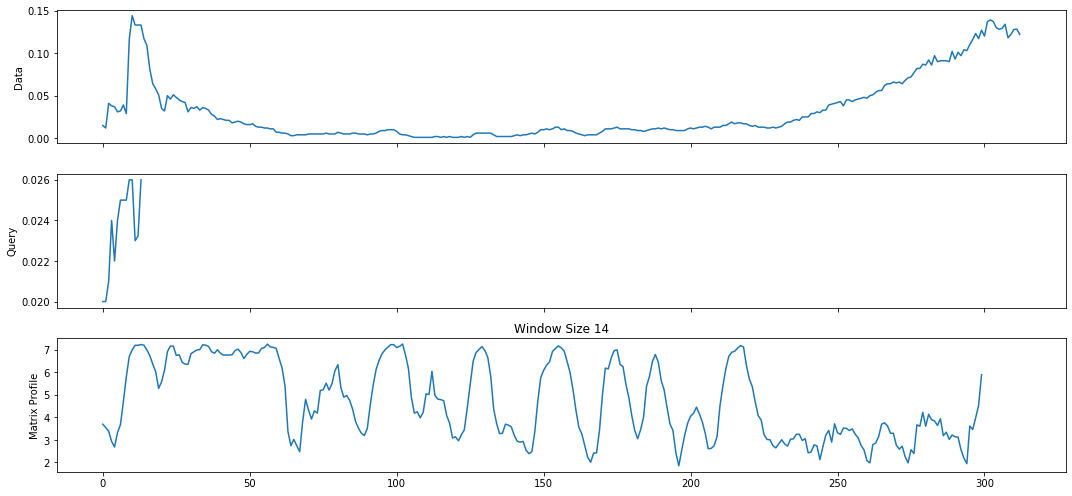

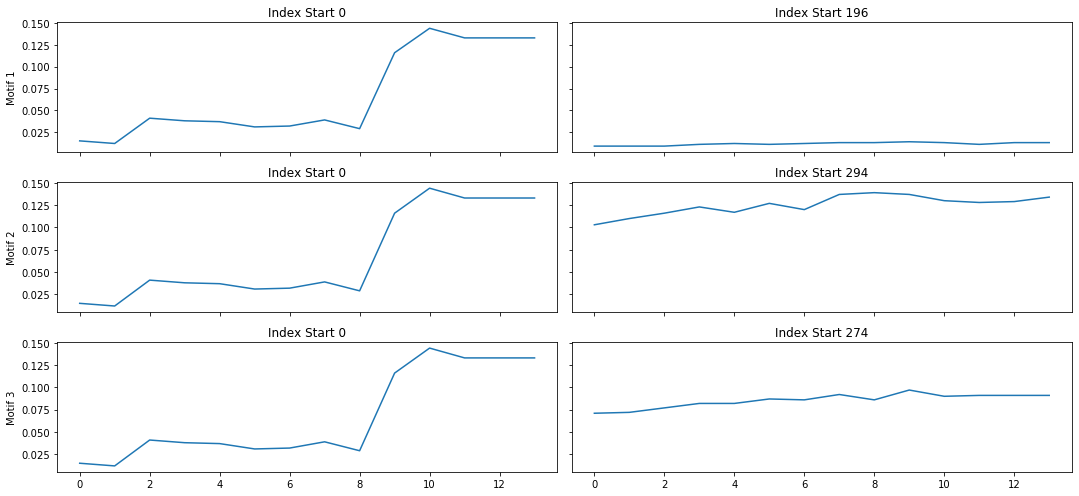

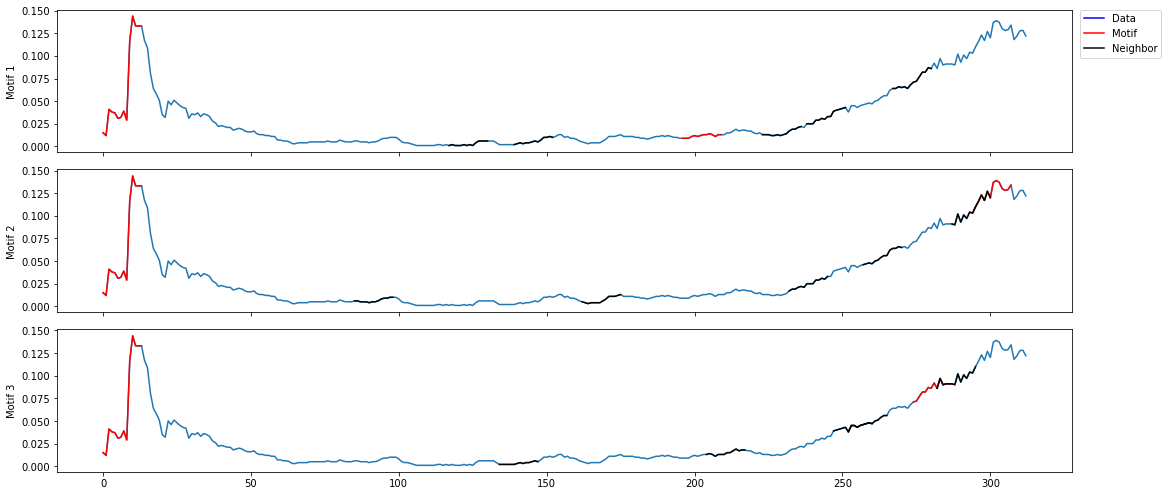

In [104]:
figures = mp.visualize(prof)

In [108]:
# overwrite plotting to visualize with plotly
def plot_motifs(profile, dates):
    w = profile['w']
    motifs = profile['motifs']
    data = profile.get('data', None)
    if data:
        ts = data.get('ts', None)

    seen_motifs = set()
    pair_num = 1
    for motif in motifs:
        if tuple(motif['motifs']) in seen_motifs:
            break
        df = pd.DataFrame(columns=['positive_rate', 'start_idx', 'date'])
        for idx in motif['motifs']:
            subquery = ts[idx:idx + w]
            indices = np.arange(len(subquery))
            subdates = dates[idx:idx + w]
            cur_df = pd.DataFrame({'positive_rate': subquery,
                                  'start_idx': idx,
                                  'date': subdates})
            df = pd.concat([df, cur_df])
        fig = px.line(df, x=df.index, y='positive_rate', facet_col='start_idx', title=f'Motif {pair_num}')
        # TODO: change
        fig.show()
        pair_num += 1
        seen_motifs.add(tuple(motif['motifs']))
    
    seen_elems = set()
    pair_num = 1
    for motif in motifs:
        if tuple(motif['motifs']) in seen_elems:
            break
        df = pd.DataFrame({'positive_rate': ts,
                          'series_type': 'regular',
                          'date': dates})
        fig = px.line(df, x='date', y='positive_rate',
                      title=f'Motif {pair_num}')
        seen_motifs = set()
        first = True
        for i, idx in enumerate(motif['motifs']):
            if idx not in seen_motifs:
                subquery = ts[idx:idx + w]
                indices = np.arange(idx, idx + w)
                subdates = dates[idx:idx + w]
                fig.add_traces(go.Scatter(
                    x=subdates,
                      y=subquery,
                      mode = 'lines',
                      line = dict(width = 2, color = 'green'),
                      name = 'motif',
                      legendgroup = 'motif',
                      showlegend = True if first else False,
                                             ))
                seen_motifs.add(idx)
                first = False

        seen_neighbors = set()
        first = True
        for i, idx in enumerate(motif['neighbors']):
            if idx not in seen_neighbors:
                subquery = ts[idx:idx + w]
                indices = np.arange(idx, idx + w)
                subdates = dates[idx:idx + w]
                fig.add_traces(go.Scatter(
                    x=subdates,
                      y=subquery,
                      mode = 'lines',
                      line = dict(width = 2, color = 'red'),
                      name = 'neighbor',
                      legendgroup = 'neighbor',
                      showlegend = True if first else False,
                                             ))
                seen_neighbors.add(idx)
                first = False

        # TODO: change       
        fig.show()
        pair_num += 1
        seen_elems.add(tuple(motif['motifs']))

In [86]:
plot_motifs(prof, dates)

In [109]:
def get_motifs(df, window_size):
    ts, dates = df_to_ts(et_df)
    # compute the MatrixProfile
    prof = mp.compute(ts, windows=window_size)
    prof = mp.discover.motifs(prof, 
                              exclusion_zone=window_size // 2, 
                              max_neighbors=5)
    plot_motifs(prof, dates)

In [110]:
get_motifs(lt_df, 14)